In [ ]:
%load_ext tensorboard

In [36]:
#Modules
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split

from category_encoders import OneHotEncoder

import datetime

import pickle

In [161]:
#constant
datapath="../Data/Data Final/"

log_dir = "../logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

batch_size=32

In [112]:
#read df
df=pd.read_csv(datapath+"oversampled.csv")

X=df.copy()
y=X.pop("Kejadian")

In [113]:
onehotencoder=OneHotEncoder(cols=["KELURAHAN"])
onehotencoder.fit(X)
Xencoded=onehotencoder.transform(X)

#save onehot encoder
with open("../assets/onehotencoder.pkl", "bw") as fh:  
    data = onehotencoder
    pickle.dump(data, fh)

In [114]:
#train test split
train_data, test_data, train_value, test_value = train_test_split(Xencoded, y, train_size= 0.8)

## Model Testing

In [200]:
def thecallback():
    return [keras.callbacks.ModelCheckpoint(log_dir+"/callbacks", save_weights_only=True),
            tf.keras.callbacks.TensorBoard(log_dir)]

def theplot(history):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(2,1,1)
    ax.plot(history.history["binary_accuracy"], label="binary_accuracy", c="blue")
    ax.plot(history.history["val_binary_accuracy"], label="val_binary_accuracy", c="orange")
    ax.set_xlabel("epochs")
    ax.set_ylabel("accuracy")
    ax.legend(loc="lower right")
    ax=fig.add_subplot(2,1,2)
    ax.plot(history.history["loss"], label="loss", c="blue")
    ax.plot(history.history["val_loss"], label="val_loss", c="orange")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_xlabel("epochs")
    ax.set_ylabel("losses")

In [196]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(16, activation='relu', input_dim=55),
      layers.Dense(32, activation='relu'),
      layers.Dense(1, activation="sigmoid")
  ])

  model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), metrics=[keras.metrics.binary_accuracy])
  return model

In [202]:
epoch=75
test1=build_and_compile_model()
test1.fit(train_data, train_value, epochs=epoch, batch_size=batch_size,
          validation_data=(test_data, test_value),
          verbose=1, callbacks=thecallback())

Epoch 1/75
40/40 [==============================] - 1s 13ms/step - loss: 2.3965 - binary_accuracy: 0.6748 - val_loss: 0.7560 - val_binary_accuracy: 0.7025
Epoch 2/75
40/40 [==============================] - 0s 10ms/step - loss: 0.6762 - binary_accuracy: 0.7381 - val_loss: 0.6355 - val_binary_accuracy: 0.7152
Epoch 3/75
40/40 [==============================] - 0s 9ms/step - loss: 0.5741 - binary_accuracy: 0.7468 - val_loss: 0.5310 - val_binary_accuracy: 0.7880
Epoch 4/75
40/40 [==============================] - 0s 8ms/step - loss: 0.4680 - binary_accuracy: 0.7983 - val_loss: 0.4310 - val_binary_accuracy: 0.8070
Epoch 5/75
40/40 [==============================] - 0s 7ms/step - loss: 0.3813 - binary_accuracy: 0.8307 - val_loss: 0.3465 - val_binary_accuracy: 0.8038
Epoch 6/75
40/40 [==============================] - 0s 7ms/step - loss: 0.3070 - binary_accuracy: 0.8623 - val_loss: 0.2885 - val_binary_accuracy: 0.8386
Epoch 7/75
40/40 [==============================] - 0s 8ms/step - loss: 0.

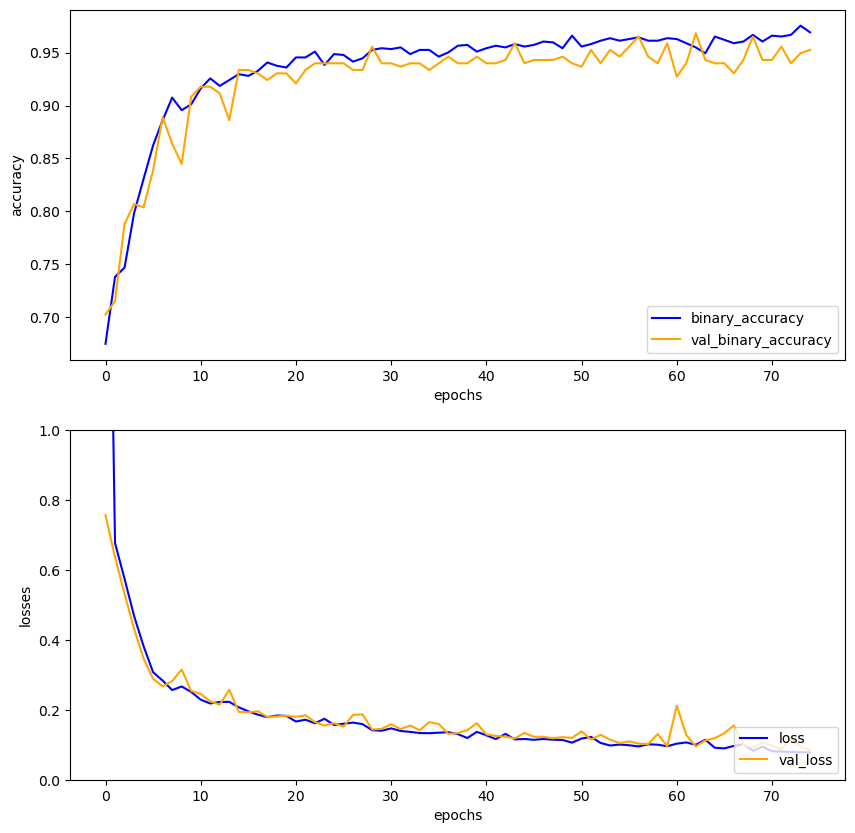

In [203]:
theplot(test1.history)

In [204]:
def predict(model, features):
    predicted=test1.predict(train_data)
    predicted = tf.where(asu < 0.5, 0, 1)
    return predicted
predicted=predict(test1, train_data)

40/40 [==============================] - 0s 2ms/step


In [233]:
np.array(asu).reshape(1,-1)[0]

array([1, 1, 1, ..., 1, 0, 1])

In [208]:
np.unique(predicted)

array([0], dtype=int64)